### Homework Assignment 2 : Group 12 
**Sanyam Jain <br>
Anvesh Karangula <br>
David Gong <br>
Jiarui Chang**

# New York City Restaurant Inspections

We will analyze restaurant inspections in New York City, starting November 1, 2014 and ending January 31, 2015. 
The data is in the file <a href="NYCRestaurants.csv">NYCRestaurants.csv</a>.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [517]:
# The dtype=str tells Pandas to load in all columns as strings.
# I do this because I know they are strings, and Pandas doesn't have to spend time figuring out the column dtypes.
df = pd.read_csv('NYCRestaurants.csv', dtype=str)

#### [Q1, 6 points] Create a unique name for each restaurant.
On the DataFrame created above, add a new column to your DataFrame called 'RESTAURANT', that combines DBA, BUILDING, STREET, ZIPCODE, and BORO fields. For example:
<pre>WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN</pre>

Print the first 10 values of the RESTAURANT column of your DataFrame.

In [634]:
cols = ['DBA', 'BUILDING', 'STREET','ZIPCODE','BORO']
df['RESTAURANT'] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

print(df['RESTAURANT'].head(10))

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


#### [Q2, 6 points] How many restaurants are included in the data?
Careful now:

*  A *Subway* in one particular address (i.e., building, street, zipcode, and boro) counts as one restaurant; don't combine all Subways into one restaurant!
* The data can have multiple violations for the same restaurant!

In [635]:
# distinct_count = df['CAMIS'].nunique()
# print('No of Unique Restaurants in the data = ' , distinct_count)
distinct_count = df['RESTAURANT'].nunique()
print('No of Unique Restaurants in the data = ' , distinct_count)

No of Unique Restaurants in the data =  10114


#### [Q3, 6 points] How many chains are there?
Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).

You'll see multiple versions of the name "DUNKIN DONUTS". Just act as if they are different chains.

In [638]:
# (df[['RESTAURANT','DBA']].drop_duplicates()['DBA'].value_counts() >= 2).sum()

df2 = df[['RESTAURANT','DBA']].copy()
series_mask = df2.drop_duplicates()['DBA'].value_counts()
filter1= (series_mask >= 2).sum()

print("No of Restaurant Chains in NYC = " , filter1)

No of Restaurant Chains in NYC =  368


#### [Q4, 6 points] Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

SUBWAY                                   144
MCDONALD'S                                79
STARBUCKS COFFEE                          74
DUNKIN' DONUTS                            69
DUNKIN DONUTS                             64
KENNEDY FRIED CHICKEN                     44
BURGER KING                               36
CROWN FRIED CHICKEN                       32
DUNKIN' DONUTS, BASKIN ROBBINS            20
CHIPOTLE MEXICAN GRILL                    18
DOMINO'S PIZZA                            18
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     16
LITTLE CAESARS                            15
POPEYES CHICKEN & BISCUITS                15
AU BON PAIN                               14
PRET A MANGER                             11
KFC                                       11
WENDY'S                                   11
CARVEL ICE CREAM                          11
HALE & HEARTY SOUPS                       10
Name: DBA, dtype: int64


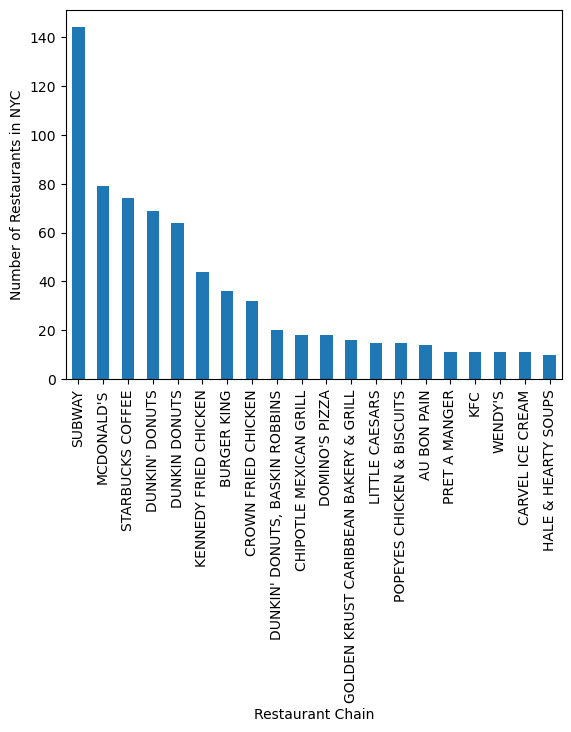

In [640]:
series_q4 = series_mask.sort_values(ascending = False)[:20]
print(series_q4)
series_q4.plot.bar()

plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Restaurants in NYC')

plt.show()
# plt.title('Bar Graph for the Series')

#### [Q5, 6 points] What fraction of all restaurants are chain restaurants?

You should think of a restaurant as being one restaurant at one location.
So *Wendy's 5th Street* and *Wendy's on 10th Street* are two different restaurants.
Essentially a restaurant is what you defined in Q1.

In [641]:
# distinct_count = df['RESTAURANT'].nunique()
# len(df2[df2['DBA'].map(series_mask >=2)].nunique())/distinct_count

df2 = df[['RESTAURANT','DBA']].copy()
series_mask = df2.drop_duplicates()['DBA'].value_counts()

n_unq_rest = df2['RESTAURANT'].nunique()
n_unq_chain_rest = df2[df2['DBA'].map(series_mask >=2)]['RESTAURANT'].nunique()

frc_chain_rest = n_unq_chain_rest/n_unq_rest

print("Fraction of Restaurants that are chain restuarants = ",frc_chain_rest)

Fraction of Restaurants that are chain restuarants =  0.16472216729286138


#### [Q6, 6 points] Plot the number of non-chain restaurants in each boro.

We need several steps:
* Figure out all the non-chain restaurants.
* Then elect out only those restaurants.
* Finally plot the number of such restaurants by boro. 
* Make sure to look at the plot; we don't want to see... oh... the *missing* boro.

MANHATTAN        3323
BROOKLYN         2180
QUEENS           1968
BRONX             659
STATEN ISLAND     312
Name: BORO, dtype: int64


<Axes: xlabel='Borough', ylabel='No of non chain restaurants'>

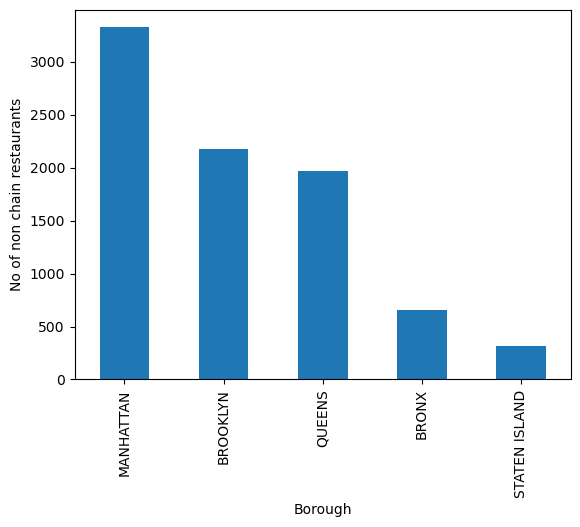

In [645]:
df2 = df[['RESTAURANT','DBA','BORO']].copy()
series_mask = df2.drop_duplicates()['DBA'].value_counts()
df3 = df2[df2['DBA'].map(series_mask <2)].drop_duplicates()

non_chain_rest_boro = df3[df3['BORO'] != 'Missing']['BORO'].value_counts()

print(non_chain_rest_boro)

non_chain_rest_boro.plot(kind = 'bar' , ylabel = "No of non chain restaurants" , xlabel = "Borough")

#### [Q7, 8 points] Plot the *fraction* of non-chain restaurants in each boro.
The boro with the most non-chain restaurants might just be the boro
with the most restaurants in general.

If we want to find the boro that attracts the most "independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

MANHATTAN        0.830542
BROOKLYN         0.862001
QUEENS           0.847910
BRONX            0.770760
STATEN ISLAND    0.791878
Name: BORO, dtype: float64


<Axes: xlabel='Borough', ylabel='Fraction of non chain restauarnts'>

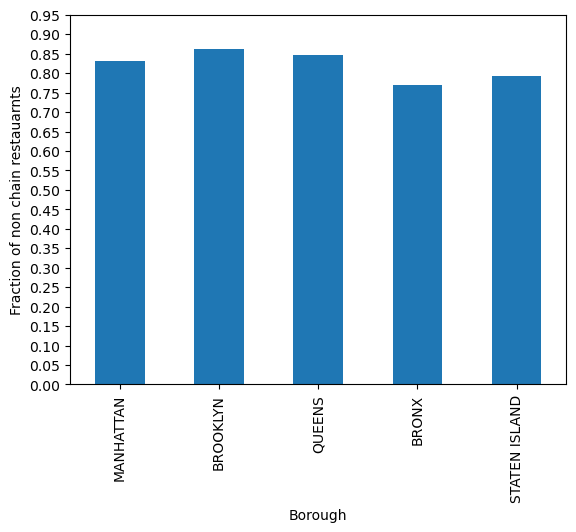

In [652]:
df2 = df[['RESTAURANT','DBA','BORO']].copy()
series_mask = df2.drop_duplicates()['DBA'].value_counts()
df3 = df2[df2['DBA'].map(series_mask <2)].drop_duplicates()

non_chain_rest_boro = df3[df3['BORO'] != 'Missing']['BORO'].value_counts()
tot_rest_boro = df2[df2['BORO'] != 'Missing'].drop_duplicates()['BORO'].value_counts()

frc_non_chain_rest_boro = non_chain_rest_boro/tot_rest_boro


print(frc_non_chain_rest_boro)
frc_non_chain_rest_boro.plot(kind = 'bar' ,yticks = [i for i in np.arange(0, 1, 0.05)] , xlabel = "Borough" , ylabel = "Fraction of non chain restauarnts")

#### [Q8, 6 points] Plot the popularity of cuisines.
Which cuisines are the most well-represented among all restaurants?

* Define the popularity of a cuisine as the number of restaurants serving that cuisine.
* Plot the popularity of the top 20 cuisines.

American                                                            2238
Chinese                                                             1098
Café/Coffee/Tea                                                      498
Pizza                                                                483
Italian                                                              451
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     391
Japanese                                                             340
Mexican                                                              339
Bakery                                                               326
Spanish                                                              311
Caribbean                                                            287
Pizza/Italian                                                        217
Donuts                                                               176
Hamburgers                                         

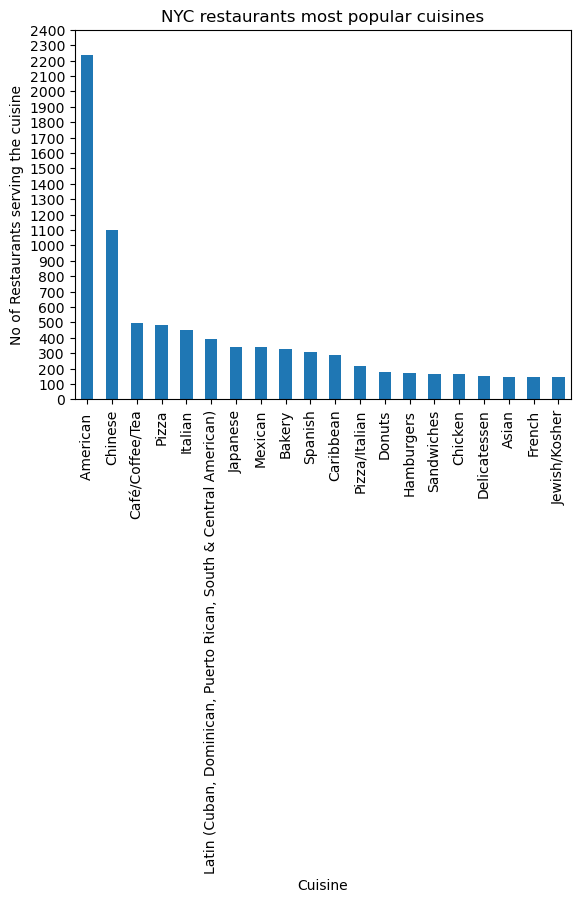

In [653]:
df2 = df.copy()[['RESTAURANT','CUISINE DESCRIPTION']]
df2 = df2.drop_duplicates()
rest_cuisine_top20 = df2['CUISINE DESCRIPTION'].value_counts()[:20]

print(rest_cuisine_top20)

plt2 = rest_cuisine_top20.plot(kind = 'bar')
# plt2 = df[['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')
plt.ylabel('No of Restaurants serving the cuisine')
plt.xlabel('Cuisine')
plt.yticks(range(0,2500, 100))
plt.title('NYC restaurants most popular cuisines')

plt.show()

#### [Q9, 9 points] Plot the cuisines among restaurants which never got cited for violations.
Ideally, you should explore and see what happens when there is no
violation, but here I will just tell you: the 'VIOLATION CODE' field
is missing.

* First, find the restaurants that were **never** cited for a code violation. 
* Then. compute the popularity of each cuisine among these "clean" restaurants.
* Plot the popularity of the top-20 among these cuisines.

American                                                            49
Chinese                                                             42
Café/Coffee/Tea                                                     14
Pizza                                                               11
Italian                                                             10
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    10
Spanish                                                              8
Japanese                                                             8
Bakery                                                               7
Asian                                                                6
Other                                                                6
Donuts                                                               5
Delicatessen                                                         5
Thai                                                                 4
French

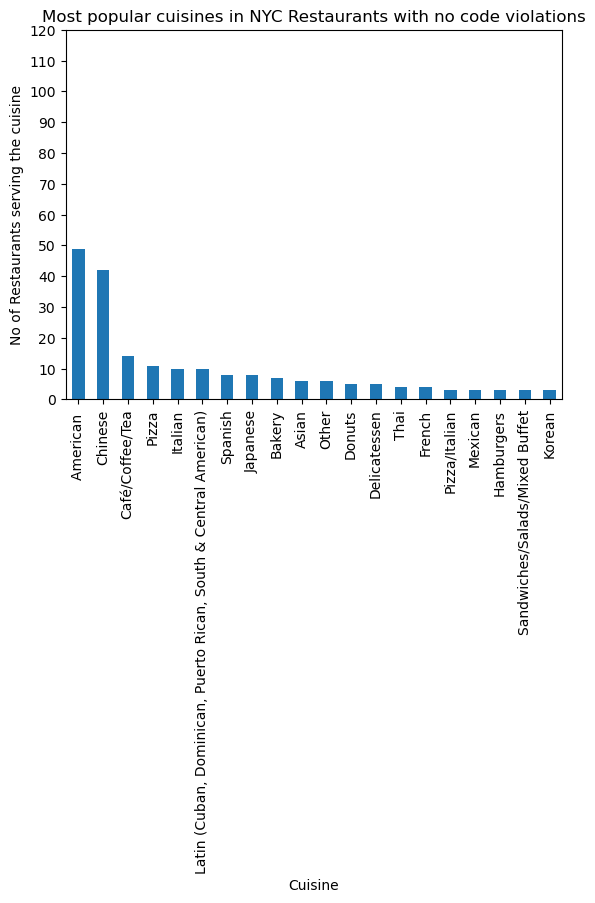

In [654]:
df2 = df.copy()[['RESTAURANT','CUISINE DESCRIPTION','VIOLATION CODE']]
mask = df2['VIOLATION CODE'].notna()
mask2 = df[mask]['RESTAURANT'].drop_duplicates()

df2['violation_ever'] = df2['RESTAURANT'].isin(mask2)
df2 = df2[df2['violation_ever'] == False]

df2 = df2.drop_duplicates(['RESTAURANT']).copy()
clean_rest_cuisine_top20 = df2['CUISINE DESCRIPTION'].value_counts()[:20]

print(clean_rest_cuisine_top20)

plt2 = clean_rest_cuisine_top20.plot(kind = 'bar')
plt.ylabel('No of Restaurants serving the cuisine')
plt.xlabel('Cuisine')
plt.yticks(range(0,125, 10))
plt.title('Most popular cuisines in NYC Restaurants with no code violations')

plt.show()

#### [Q10, 6 points] What cuisines tend to be the "cleanest"?

* Select all cuisines for which there were at least 20 restaurants representing that cuisine.
* For each such cuisine, compute the ratio of the counts in Q9 to Q8. This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine.
* Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are "most likely to be clean."

In [655]:
df2 = df.copy()[['RESTAURANT','CUISINE DESCRIPTION','VIOLATION CODE']]
mask = df2.drop_duplicates(['RESTAURANT','CUISINE DESCRIPTION'])['CUISINE DESCRIPTION'].value_counts() >= 20

mask_bool = df2['CUISINE DESCRIPTION'].map(mask)

mask = df2['VIOLATION CODE'].notna()
mask2 = df[mask]['RESTAURANT'].drop_duplicates()

df3 = df2.copy()
df3['violation_ever'] = df3['RESTAURANT'].isin(mask2)
violation_code_filter = df3['violation_ever'] == False


Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64


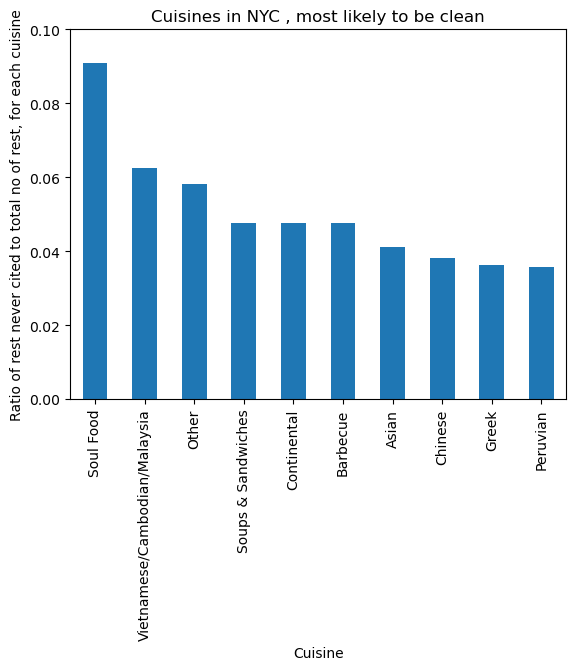

In [656]:
series_cuisine1 = df2[mask_bool][['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
series_cuisine2 = df2[mask_bool & violation_code_filter][['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()


series_cuisine3 = series_cuisine2/series_cuisine1

print(series_cuisine3.sort_values(ascending = False)[:10])
plt2  = series_cuisine3.sort_values(ascending = False)[:10].plot(kind = 'bar')


plt.ylabel('Ratio of rest never cited to total no of rest, for each cuisine')
plt.xlabel('Cuisine')
plt.yticks(np.arange(0,0.12, 0.02))
plt.title('Cuisines in NYC , most likely to be clean')

plt.show()

#### [Q11, 8 points] What are the most common violations in each  borough?

* Create a table of the number of times each violation description was observed in each borough.
    * To create the table, check out the **crosstab** function. We will see a more general version of this when we discuss **groupby** in class.
* Figure out the most common violation description for each borough.

In [662]:
df3 = pd.crosstab(df['VIOLATION DESCRIPTION'] , df['BORO'])
df3 = df3.drop('Missing' , axis = 1)

for position, column in enumerate(df3.columns):
    condition = df3[column] == df3[column].max()
    print("Borough = " , column) , 
    print("Most frequent Violation Description = \n" , df3[condition].index[0])
    print("Frequency = ",df3[condition].iloc[0,position])
    print("=================")

Borough =  BRONX
Most frequent Violation Description = 
 Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.
Frequency =  500
Borough =  BROOKLYN
Most frequent Violation Description = 
 Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.
Frequency =  1485
Borough =  MANHATTAN
Most frequent Violation Description = 
 Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, ab

#### [Q12, 9 points] What are the most common violations per borough, *after normalizing for the relative abundance of each violation?*

Hopefully, the answer to the previous question left you unsatisfied,
because some violations are just very common, irrespective of borough.
A better approach would be to **normalize** the violation counts, as
follows.

* **Get overall frequencies:** Figure out how common each violation is, over the entire dataset; let's call this <tt>violationFrequency</tt>.
* **Normalize:** Consider the table of number of violations by borough that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by <tt>violationFrequency</tt>. We want to do this **for each borough**.
* **Find the biggest violations:** After this normalization, for each borough, figure out the most common violation description.

In [663]:
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()

df3 = pd.crosstab(df['VIOLATION DESCRIPTION'] , df['BORO'])
df3 = df3.drop('Missing' , axis = 1)

df3['TOTAL'] = pd.Series(violationFrequency , index = df3.index)
df4 = df3.copy()
for position, column in enumerate(df4.columns[:-1]):
        df4[column] = df4[column]/df4['TOTAL']

In [664]:
for position, column in enumerate(df4.columns[:-1]):
    condition = df4[column] == df4[column].max()
    print("Borough = " , column)
    print("Most frequent Violation Description = \n" , list(df4[condition].index[:]))
    print("Normalized Frequency = ",df4[condition].iloc[0,position])
    print("=================")

Borough =  BRONX
Most frequent Violation Description = 
 ['Unprotected food re-served.']
Normalized Frequency =  0.5
Borough =  BROOKLYN
Most frequent Violation Description = 
 ['Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.']
Normalized Frequency =  0.7142857142857143
Borough =  MANHATTAN
Most frequent Violation Description = 
 ['Out-of package sale of tobacco products observed.', 'Potable water supply inadequate. Water or ice not potable or from unapproved source.  Cross connection in potable water supply system observed.']
Normalized Frequency =  1.0
Borough =  QUEENS
Most frequent Violation Description = 
 ['Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.', 'Harmful, noxious gas or vapor detected. CO ~1 3 ppm.', 'Raw foo

#### [Q13, 8 points] How many phone area codes correspond to a single zipcode?
The first three digits of the restaurant phone numbers are their area
codes. The area codes do not generally align with zip codes, but some
area codes are only for a single zip code. You must figure out how
many area codes have this property.

*Hint:* To extract the first 3 characters of the phone number, recall that strings are pretty similar to lists.

In [665]:
df['area_code'] = df['PHONE'].str[0:3]
grouped = df[['area_code','ZIPCODE']].drop_duplicates()

# mask1 : Cleaning the area code for phone number listed as 0 . If we ignore that, the ANSWER will be 34.
mask1 = grouped['area_code'] != '000'

mask2 = grouped[mask1]['area_code'].value_counts() == 1
print('No of Phone area codes correspond to a single zipcode = ')
print(mask2.sum())

No of Phone area codes correspond to a single zipcode = 
33


#### [Q14, 10 points] Find common misspellings of street names.
Sometimes, it's "Avenue", and sometimes, it's "Ave". We will
try to come up with an automated way to find common misspellings. The
idea is the following: if "Ave" and "Avenue" are the same,
they should show up often in similar-sounding street names, e.g., *Lexington Ave* and *Lexington Avenue*.

* Create a new column, called <tt>STREET TYPE</tt>, which is the the last word in the name of the street.
    * For example, if the street is *Astoria Boulevard*, the street type should be *Boulevard*.
* Create another column, called <tt>STREET BASE</tt>, which contains everything **except** the last word in the name of the street.
    * For example, if the street is *Astoria Boulevard*, the street base should be *Astoria*.
* Create a third column, called <tt>STREET BASE & ZIP</tt>, that combines the street base and the zipcode.
* Create a table containing just these three columns, and remove any duplicates or instances where street base is empty.
    * This table now contains unique street names, along with the street type.
* Merge this table with itself, on the <tt>STREET BASE & ZIP</tt> column. 
    * Thus, in the new merged tabled, we will have two <tt>STREET TYPE</tt> fields for each street base and zipcode.
    * For example, if both *Lexington Ave* and *Lexington Avenue* exist in the same zipcode, we will get a row for the street base *Lexington* and the two street types *Ave* and *Avenue*.
* From the merged table, select only the rows where the street types are different.
* Now, do a cross-tabulation of the two distinct street types (check out the **crosstab** function in Pandas).
    * This gives us the number of times *Ave* and *Avenue* were used with the same <tt>STREET BASE & ZIP</tt>.
* From this cross-tabulation table, find the most commonly street type that occurs with each of the following: *AVE*, *ST*, *RD*, *PL*, *BOULEARD*, and *BULEVARD*.

In [666]:
df['STREET TYPE'] = df['STREET'].str.split(' ').str[-1]
df['STREET BASE'] = df['STREET'].str.split(' ').str[:-1].str.join(' ')
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

df5 = df[['STREET TYPE' , 'STREET BASE' ,'STREET BASE & ZIP']].copy().drop_duplicates()

df5_merged = pd.merge(df5,df5 , on ='STREET BASE & ZIP')

mask = df5_merged['STREET TYPE_x'] != df5_merged['STREET TYPE_y']
df5_merged = df5_merged[mask]

cross_tab = pd.crosstab(df5_merged['STREET TYPE_x'] , df5_merged['STREET TYPE_y'])
cross_tab = cross_tab[['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']]

In [667]:
for i in cross_tab.columns:
    print(i , cross_tab[i].idxmax())

AVE AVENUE
ST STREET
RD ROAD
PL PLACE
BOULEARD BLVD
BULEVARD BLVD


### THE END